In [171]:
using CSV, Tables, LinearAlgebra, Random, Gurobi, JuMP, DataFrames, Statistics, MLJ, Plots, Clustering, Distances

In [180]:
include("../src/utils.jl");
include("../src/opt.jl");

In [173]:
K, N, D, std, seed = 2, 8, 2, 0.45, 42

(2, 8, 2, 0.45, 42)

In [174]:
data = generate_points(K, N, D, std, seed);

In [175]:
data

8×2 Matrix{Float64}:
 1.0        0.0867316
 0.930496   0.0
 0.446702   0.867465
 0.0906541  0.869116
 0.217638   1.0
 0.288571   0.875856
 0.0        0.922623
 0.907233   0.131049

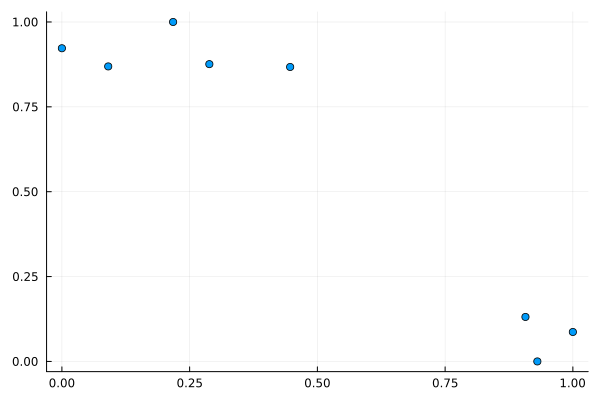

In [176]:
plot(data[:,1], data[:,2], seriestype=:scatter, legend=false)

In [181]:
assignments = gamma_formulation(data, K)
centroids = get_centroids(assignments, data)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18


2×2 Matrix{Float64}:
 1.0       0.0867316
 0.411613  0.666587

In [182]:
#a, θ, f, b, γ = gamma_formulation(data, K);

In [183]:
assignments

8×2 Matrix{Float64}:
  1.0  0.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0

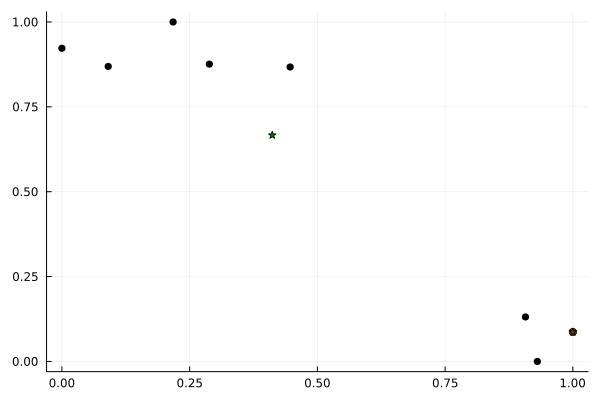

In [184]:
mapping = Dict(1=>:red, 2=>:black, 3=>:blue)
colors = [mapping[v] for v in argmax.(eachrow(assignments))];

plot(data[:,1], data[:,2], seriestype=:scatter, legend=false, color=colors)
plot!(centroids[:,1], centroids[:,2], seriestype=:scatter, legend=false, color=:green, markershape=:star5)